# Importing Dataframes

In [1]:
import pandas as pd

In [2]:
# Import data frames to use for machine learning in jupyter notebooks
Goalless = pd.read_csv('../final_files/Goalless.csv', index_col=0)
OneGoal = pd.read_csv('../final_files/OneGoal.csv', index_col=0)
TwoGoals = pd.read_csv('../final_files/TwoGoals.csv', index_col=0)
ThreeGoalsPlus = pd.read_csv('../final_files/ThreeGoalsPlus.csv', index_col=0)
model_data = pd.read_csv('../final_files/Final_Model_Data.csv', index_col=0)

# Supervised Machine Learning: Classification

### Reading the files

### Necessary imports

In [3]:
# PREPROCESSING & MODEL SELECTION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

# PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

# STANDARD MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ENSEMBLE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# XGBOOST 
from xgboost import XGBClassifier

### Defining functions

In [4]:
def evaluate_classifiers(X, y, n_splits=10, shuffle=True, random_state=0):
    X_std = StandardScaler().fit_transform(X)
    X_minmax = MinMaxScaler().fit_transform(X)
    
    features = [('Normal',       X), 
                ('Standardized', X_std), 
                ('MinMax',       X_minmax)]
    
    models = [('LogisticRegression',         LogisticRegression(solver="liblinear")),
              ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
              ('KNeighborsClassifier',       KNeighborsClassifier()),
              ('Naive Bayes',                GaussianNB()),
              ('DecisionTreeClassifier',     DecisionTreeClassifier()),
              ('SupportVectorMachine',       SVC(gamma="scale"))]
    
    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        
        for feature in features:
            res = cross_val_score(model[1], feature[1], y, cv=kfold)
            
            [results.append((model[0], feature[0], model[0]+'_'+feature[0], r)) for r in res]
    
    results = pd.DataFrame(results, columns=['Model', 'FeatureScaling', 'Combined', 'Result'])
    return results

In [5]:
def evaluate_ensembles(X, y, max_features=10, n_estimators=50, n_splits=10, shuffle=True, random_state=0):
    models = [
        ('BaggingClassifier',          BaggingClassifier(n_estimators=n_estimators,
                                                         max_features=max_features, 
                                                         random_state=random_state)),
        
        ('RandomForestClassifier',     RandomForestClassifier(n_estimators=n_estimators, 
                                                              max_features=max_features, 
                                                              random_state=random_state)),
        
        ('ExtraTreesClassifier',       ExtraTreesClassifier(n_estimators=n_estimators, 
                                                            max_features=max_features, 
                                                            random_state=random_state)),
        
        ('AdaBoostClassifier',         AdaBoostClassifier(n_estimators=n_estimators, 
                                                          random_state=random_state)),
        
        ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=n_estimators, 
                                                                  max_features=max_features, 
                                                                  random_state=random_state))]

    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        res = cross_val_score(model[1], X, y, cv=kfold)
        [results.append((model[0], r)) for r in res]
    
    results = pd.DataFrame(results, columns=['Model', 'Result'])
    return results

### Goalless Classification

In [6]:
X = Goalless.drop('Goalless', axis=1).values
y = Goalless['Goalless'].values

Football Dataset Results:


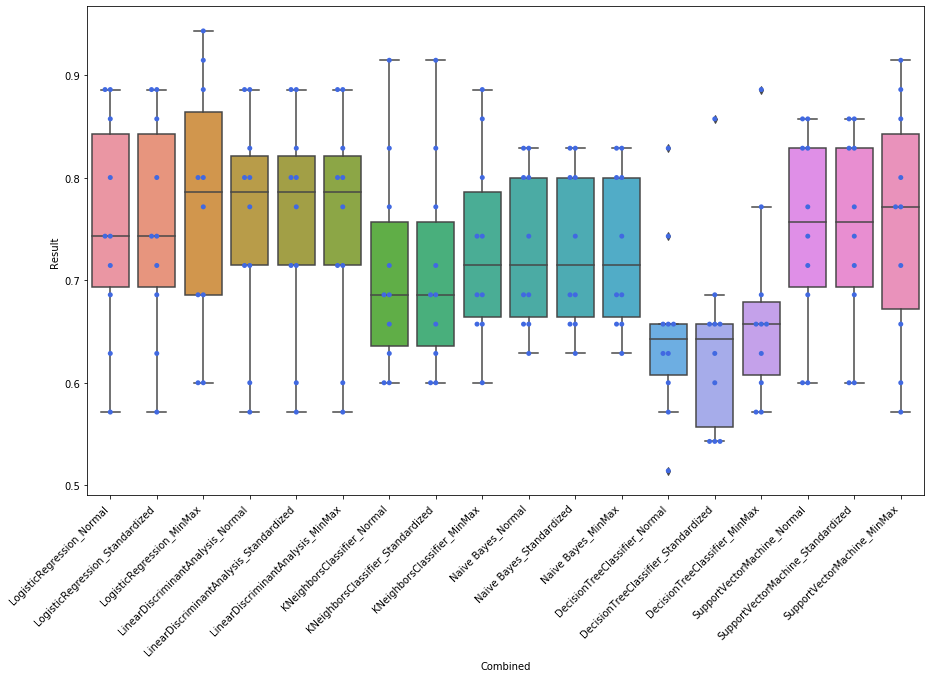

In [7]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

Football Dataset Results:


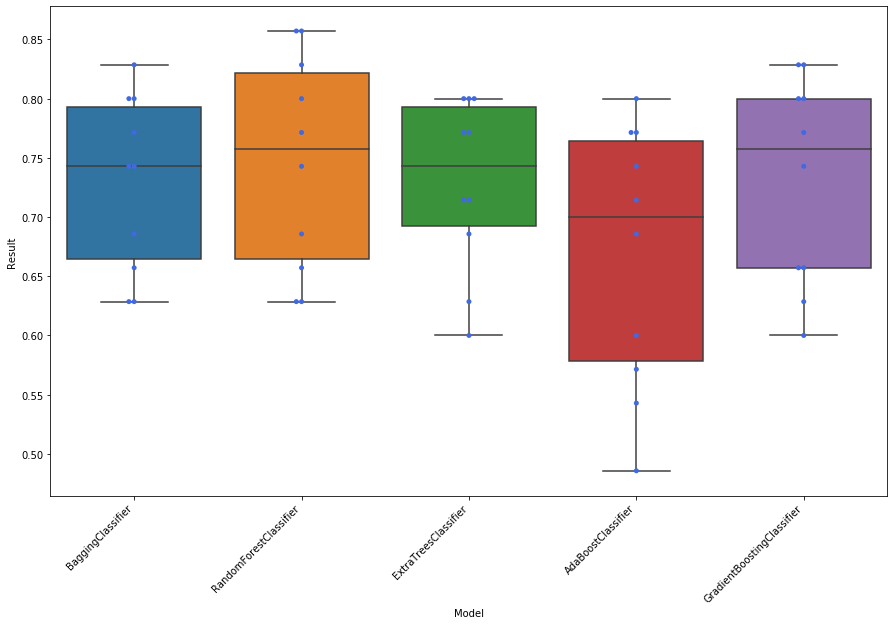

In [8]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

In [9]:
from xgboost import XGBClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBClassifier()

results = cross_val_score(model, X, y, cv=kfold)

results.mean()*100

71.71428571428574

### One Goal Classification

In [10]:
X = OneGoal.drop('OneGoal', axis=1).values
y = OneGoal['OneGoal'].values

Football Dataset Results:


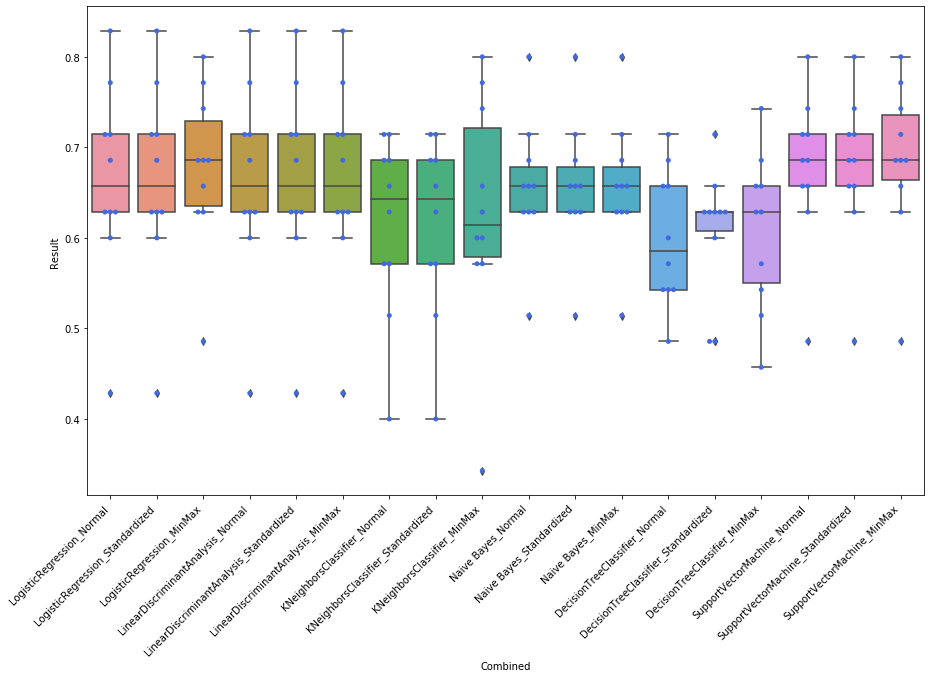

In [11]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

Football Dataset Results:


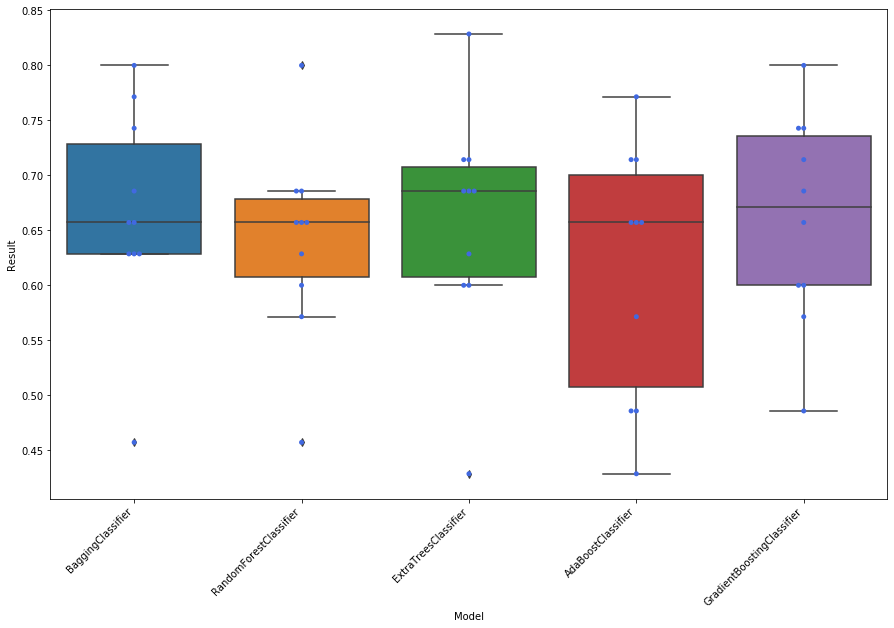

In [12]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

In [13]:
from xgboost import XGBClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBClassifier()

results = cross_val_score(model, X, y, cv=kfold)

results.mean()*100

62.57142857142858

### Two Goal Classification

In [14]:
X = TwoGoals.drop('TwoGoals', axis=1).values
y = TwoGoals['TwoGoals'].values

Football Dataset Results:


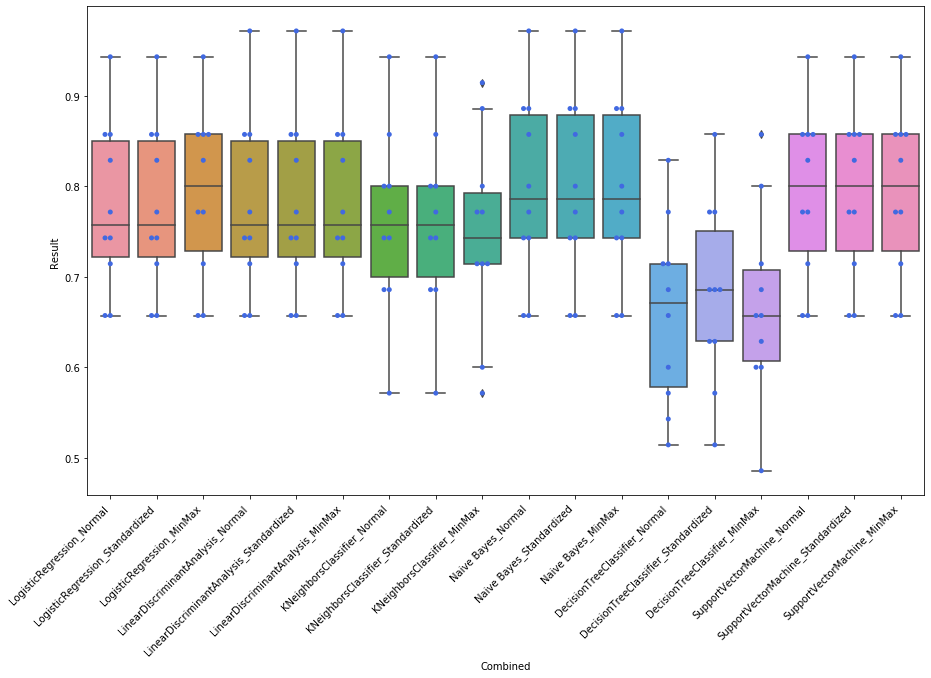

In [15]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

Football Dataset Results:


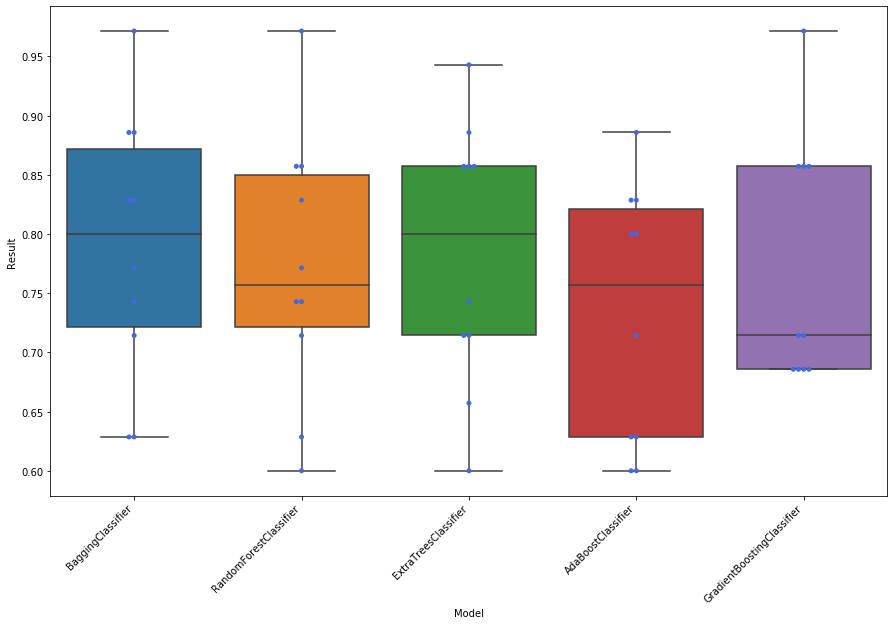

In [16]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

In [17]:
from xgboost import XGBClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBClassifier()

results = cross_val_score(model, X, y, cv=kfold)

results.mean()*100

75.71428571428571

### Three Goals Plus Classification

In [18]:
X = ThreeGoalsPlus.drop('ThreeGoals+', axis=1).values
y = ThreeGoalsPlus['ThreeGoals+'].values

Football Dataset Results:


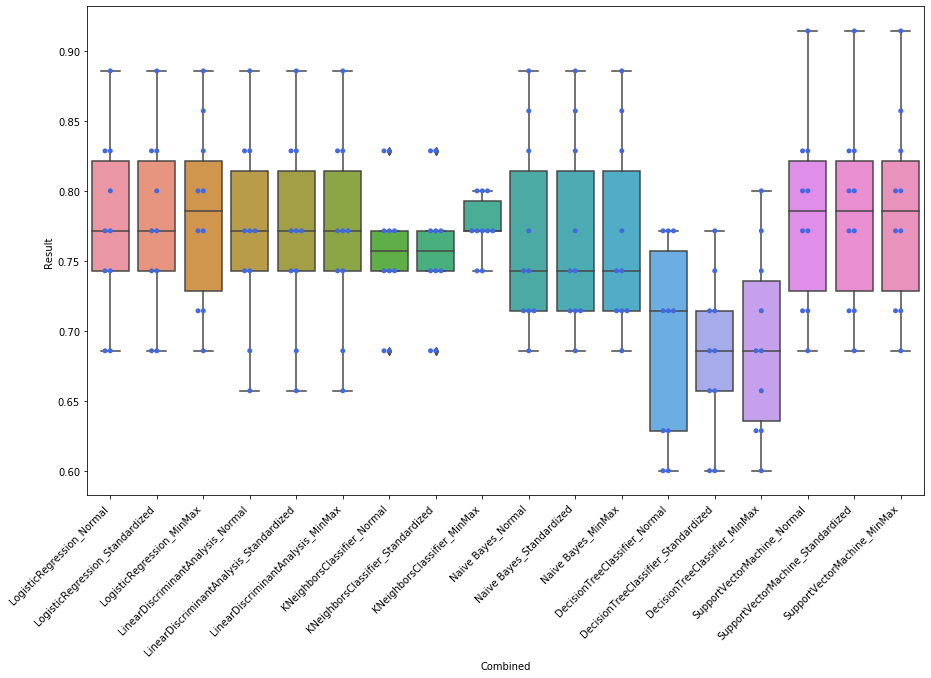

In [19]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

Football Dataset Results:


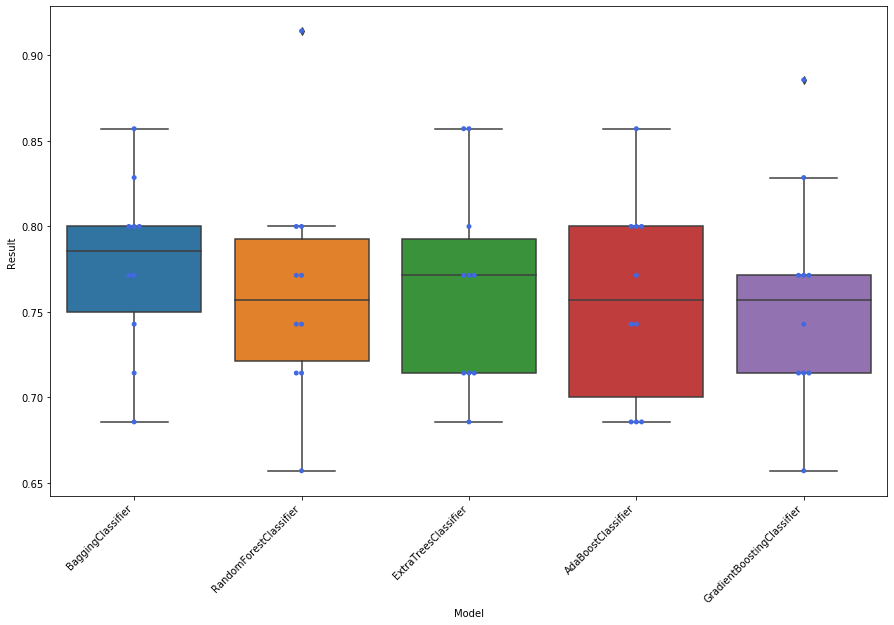

In [20]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

In [21]:
from xgboost import XGBClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBClassifier()

results = cross_val_score(model, X, y, cv=kfold)

results.mean()*100

74.57142857142858

### Full Model Classification (Target variable is 0, 1, 2, 3+)

In [22]:
model_data['Goals'] = model_data['Goals'].apply(str)

In [23]:
X = model_data.drop('Goals', axis=1).values
y = model_data['Goals'].values

Football Dataset Results:


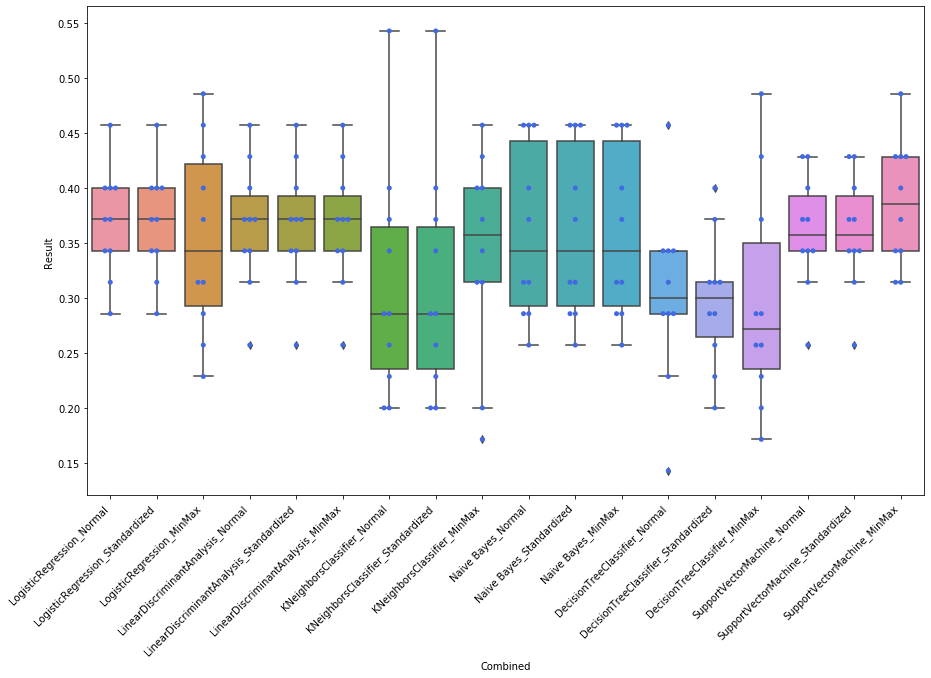

In [24]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

Football Dataset Results:


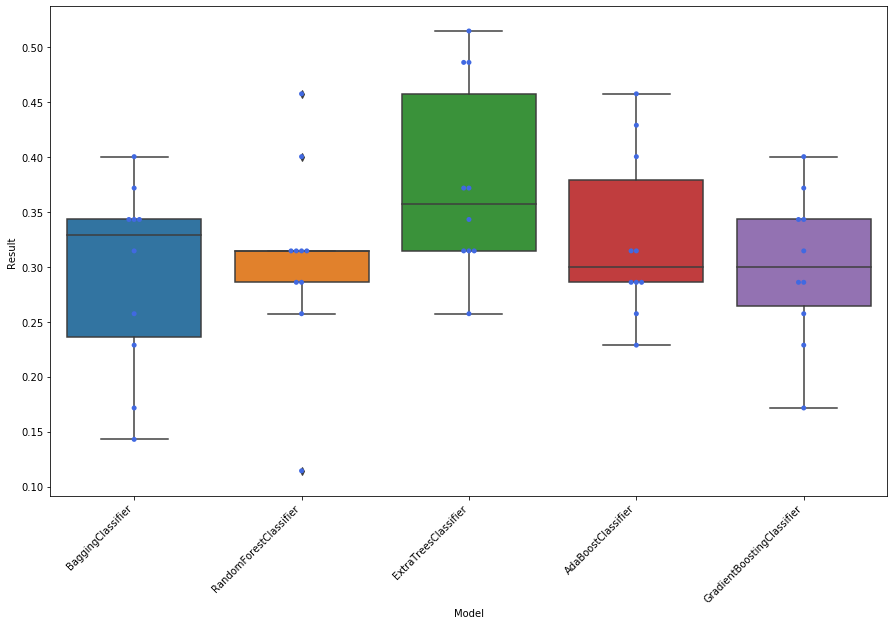

In [25]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Football Dataset Results:')

In [26]:
from xgboost import XGBClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBClassifier()

results = cross_val_score(model, X, y, cv=kfold)

results.mean()*100

29.142857142857142

# Supervised Machine Learning: Regression

### Necessary Imports

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score

### Defining Functions

In [28]:
def evaluate_regressors(X, y, n_splits=10, shuffle=True, random_state=0, scoring='neg_mean_squared_error'):
    
    models = [('LinearRegression',      LinearRegression()),
              ('Ridge',                 Ridge()),
              ('Lasso',                 Lasso()),
              ('ElasticNet',            ElasticNet()),
              ('KNeighborsRegressor',   KNeighborsRegressor()),
              ('DecisionTreeRegressor', DecisionTreeRegressor()),
              ('SVR',                   SVR(gamma="auto")),
              ('XGBoostRegressor',      XGBRegressor(objective='reg:squarederror'))]
    
    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        res = cross_val_score(model[1], X, y, cv=kfold, scoring=scoring)
        [results.append((model[0], r)) for r in res]
    
    results = pd.DataFrame(results, columns=['Model', 'Result'])
    return results

## Full Model Regression

In [29]:
model_data['Goals'] = pd.to_numeric(model_data['Goals'])

In [30]:
X = model_data.drop('Goals', axis=1)
y = model_data['Goals'].values

In [31]:
kfold = KFold(n_splits=7, random_state=7)
model = LinearRegression()

results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

print('Negative Mean Squared Error: ', round(results.mean(), 2))

Negative Mean Squared Error:  -1.03


/Users/andrewlitkie/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(f'MAE - Mean Absolute Error {metrics.mean_absolute_error(y_test, y_pred):.3f}')
print(f'MSE - Mean Square Error  {metrics.mean_squared_error(y_test, y_pred):.3f}')
print(f'R2    {metrics.r2_score(y_test, y_pred):.3f}')

MAE - Mean Absolute Error 0.849
MSE - Mean Square Error  0.992
R2    0.146


Football Data Results:


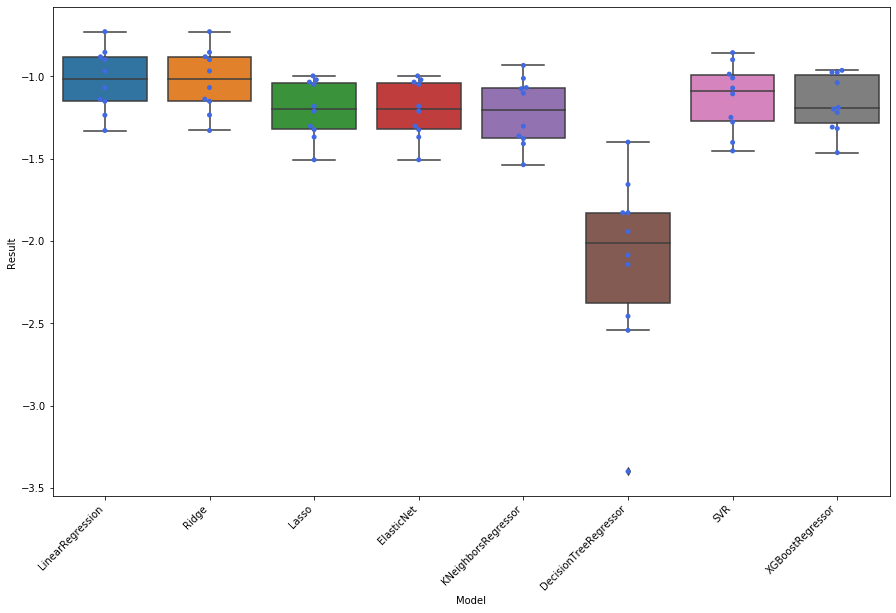

In [33]:
import seaborn as sns

results = evaluate_regressors(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')
print('Football Data Results:')

In [34]:
from xgboost import XGBRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = XGBRegressor(objective='reg:squarederror')

results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

results.mean()

-1.1653042478476872

In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0,2],
    'n_estimators': [150, 200, 250]
}


grid = GridSearchCV(estimator=model, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X,y)

print(grid.best_score_)

-1.1452521559581155


In [36]:
print(grid.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
